In [ ]:
# prompt: Read the Data from Yahoo finance website directly.
#Perform cleaning.•What was the change in stock price over time?
#Visualize the change in a stock’s volume being traded, over time?
#What was the moving average of various stocks?
#What was the daily return average of a stock?
#Adda new column ‘Trend’ whose values are based on the 'Daily Return'.
#Visualize trend frequency through a Pie Chart.
#What was the correlation between the daily returns of different stocks?

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the ticker symbol
tickerSymbol = 'MSFT'

In [ ]:
# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [ ]:
# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1mo')

In [ ]:
# --- Data Cleaning ---
# Handle missing values (if any)
tickerDf.dropna(inplace=True)

In [ ]:
# --- Stock Price Change ---
tickerDf['Price Change'] = tickerDf['Close'].diff()
print("Change in Stock Price Over Time:\n", tickerDf['Price Change'])

Change in Stock Price Over Time:
 Date
2025-03-05 00:00:00-05:00          NaN
2025-03-06 00:00:00-05:00    -4.129974
2025-03-07 00:00:00-05:00    -3.580017
2025-03-10 00:00:00-04:00   -13.149994
2025-03-11 00:00:00-04:00     0.290009
2025-03-12 00:00:00-04:00     2.819977
2025-03-13 00:00:00-04:00    -4.500000
2025-03-14 00:00:00-04:00     9.790009
2025-03-17 00:00:00-04:00     0.140015
2025-03-18 00:00:00-04:00    -5.180023
2025-03-19 00:00:00-04:00     4.300018
2025-03-20 00:00:00-04:00    -0.980011
2025-03-21 00:00:00-04:00     4.420013
2025-03-24 00:00:00-04:00     1.819977
2025-03-25 00:00:00-04:00     2.080017
2025-03-26 00:00:00-04:00    -5.190002
2025-03-27 00:00:00-04:00     0.609985
2025-03-28 00:00:00-04:00   -11.779999
2025-03-31 00:00:00-04:00    -3.409973
2025-04-01 00:00:00-04:00     6.799988
2025-04-02 00:00:00-04:00    -0.049988
2025-04-03 00:00:00-04:00    -9.030029
2025-04-04 00:00:00-04:00   -13.269989
Name: Price Change, dtype: float64


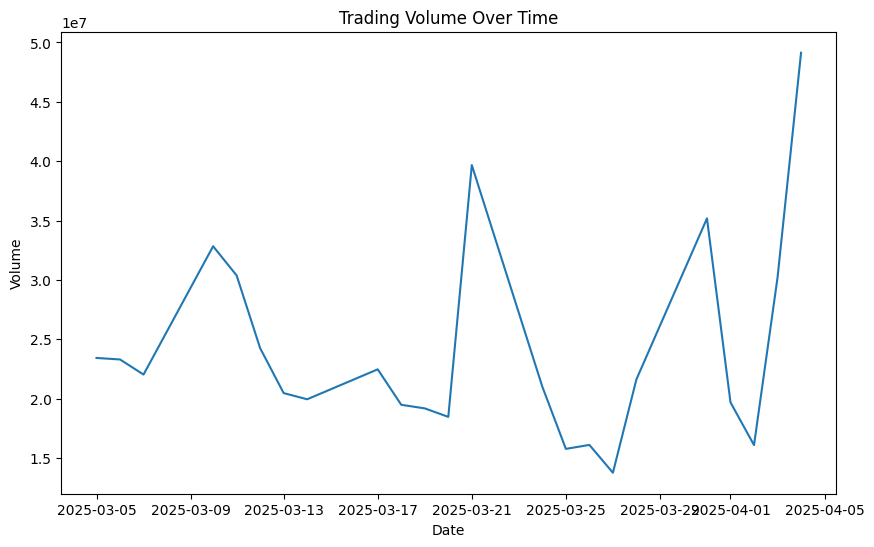

In [ ]:
# --- Visualize Trading Volume ---
plt.figure(figsize=(10, 6))
plt.plot(tickerDf.index, tickerDf['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

In [ ]:
# --- Moving Average ---
tickerDf['MA50'] = tickerDf['Close'].rolling(window=50).mean()  # 50-day moving average
# You can calculate other moving averages (e.g., 20-day, 100-day) similarly

In [ ]:

# --- Daily Return ---
tickerDf['Daily Return'] = tickerDf['Close'].pct_change()
print("\nDaily Return Average:", tickerDf['Daily Return'].mean())


Daily Return Average: -0.004787667346285284


In [ ]:
# --- Trend Column ---
tickerDf['Trend'] = 'No Trend' # Initialize Trend to 'No Trend'
tickerDf.loc[tickerDf['Daily Return'] > 0, 'Trend'] = 'Up'
tickerDf.loc[tickerDf['Daily Return'] < 0, 'Trend'] = 'Down'

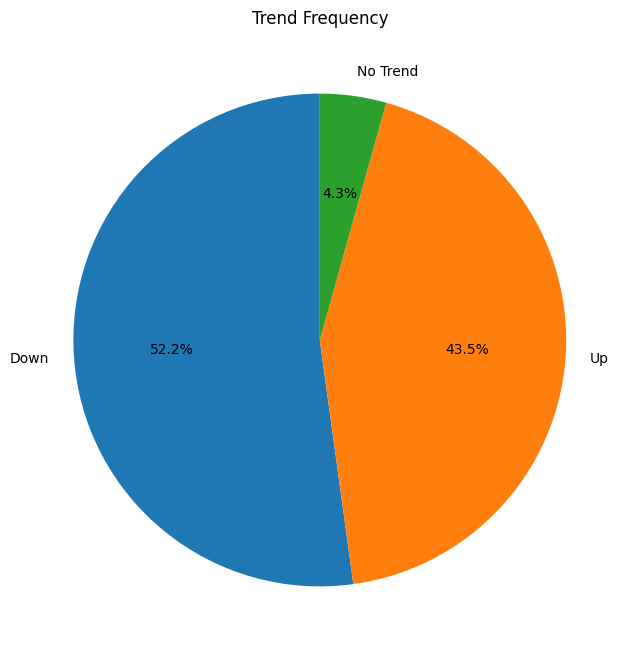

In [ ]:
# --- Trend Frequency Pie Chart ---
trend_counts = tickerDf['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trend Frequency')
plt.show()

In [ ]:
# --- Correlation of Daily Returns (Example with other stocks) ---
# Get data for other stocks
other_tickers = ['AAPL', 'GOOG']  # Example tickers
other_data = {}
for ticker in other_tickers:
  other_data[ticker] = yf.download(ticker, period='1mo')
  # Check if 'Adj Close' column exists before accessing it
  if 'Adj Close' in other_data[ticker].columns:
    other_data[ticker]['Daily Return'] = other_data[ticker]['Adj Close'].pct_change()
  # If 'Adj Close' is not present, try using 'Close' instead
  elif 'Close' in other_data[ticker].columns:
    other_data[ticker]['Daily Return'] = other_data[ticker]['Close'].pct_change()
  else:
    print(f"Warning: Neither 'Adj Close' nor 'Close' found for {ticker}. Skipping daily return calculation.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Merge daily returns into one DataFrame
combined_returns = pd.DataFrame()
combined_returns['MSFT'] = tickerDf['Daily Return']

for ticker, data in other_data.items():
  combined_returns[ticker] = data['Daily Return']

combined_returns.dropna(inplace=True)

In [ ]:
# Calculate correlation matrix
correlation = combined_returns.corr()

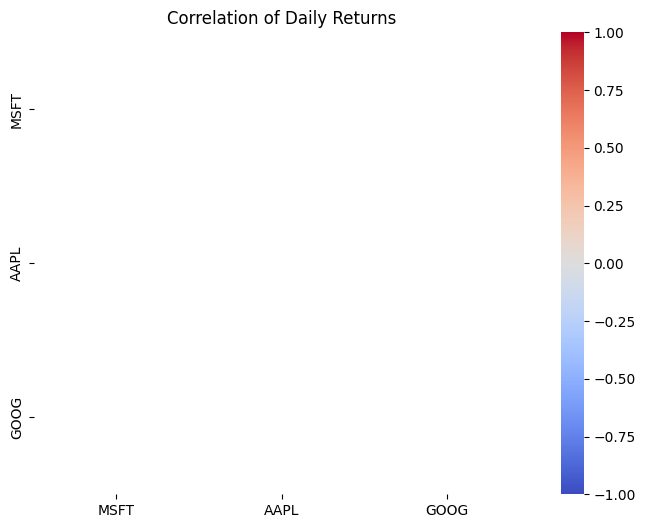

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Daily Returns')
plt.show()